In [1]:
# Make a Directory for working in G-colab
# !mkdir -p ~/ .kaggle

In [2]:
# !cp kaggle.json ~/ .kaggle/

In [3]:
# Downloading the data

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:08<00:00, 184MB/s]
100% 1.06G/1.06G [00:09<00:00, 127MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
# Importing the necessary libraries

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [14]:
# Generator - In-memory usage

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

# label_mode - To make target int(0 and 1)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [17]:
# Scaling of the data

def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [20]:
model = Sequential()

In [21]:
# First Conv
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Second Conv
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Third Conv
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Fourth Conv
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Flattening - 2D array conversion
model.add(Flatten())

# Fully Connected NN:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid')) # Output layer for binary classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,460,801 (13.20 MB)

 Trainable params: 3,460,673 (13.20 MB)

 Non-trainable params: 128 (512.00 B)

In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 80ms/step - accuracy: 0.5007 - loss: 0.6944 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.5031 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 76ms/step - accuracy: 0.5042 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.5026 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 76ms/step - accuracy: 0.5017 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 79ms/step - accuracy: 0.5020 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 76ms/step - accuracy: 0.5002 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 73ms/step - accuracy: 0.5006 - loss: 0.6932 - 

In [25]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [26]:
def preprocess_image(image_path, target_size=(256, 256)):
  img = load_img(image_path, target_size=target_size)
  img_array = img_to_array(img)
  img_array = img_array / 255.0
  img_array = np.expand_dims(img_array, axis=0)
  return img_array

In [27]:
img1 = preprocess_image("/content/R (1)_11zon.jpeg")

In [28]:
import matplotlib.pyplot as plt

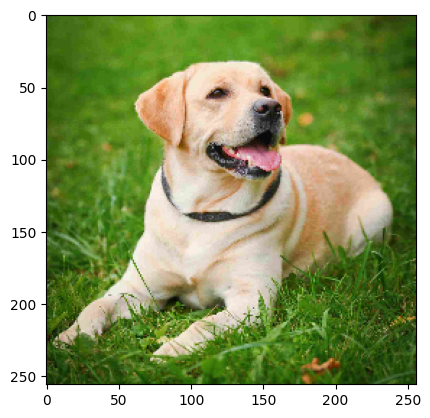

In [31]:
plt.imshow(img1[0])

In [40]:
img2 = preprocess_image("/content/photo-1557773910-e340bfebbe62_11zon.jpeg")

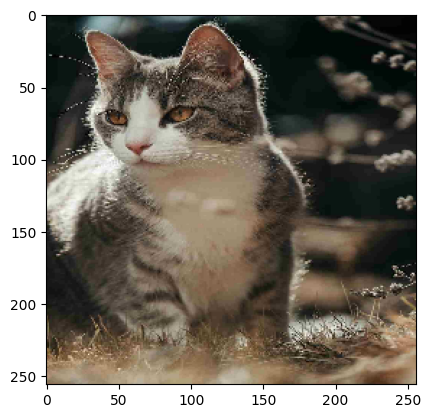

In [41]:
plt.imshow(img2[0])

In [34]:
plt.imread("/content/R_11zon (1).jpeg")

array([[[ 98, 100,  86],
        [105, 107,  93],
        [113, 115, 101],
        ...,
        [ 98,  75,  41],
        [ 96,  73,  39],
        [ 95,  72,  38]],

       [[ 97,  99,  85],
        [102, 104,  90],
        [110, 112,  98],
        ...,
        [ 98,  75,  41],
        [ 96,  73,  39],
        [ 95,  72,  38]],

       [[ 94,  96,  82],
        [ 98, 100,  86],
        [103, 105,  91],
        ...,
        [ 98,  75,  41],
        [ 96,  73,  39],
        [ 95,  72,  38]],

       ...,

       [[ 28,  26,  40],
        [ 27,  25,  39],
        [ 26,  24,  38],
        ...,
        [122,  97,  77],
        [115,  90,  70],
        [109,  84,  64]],

       [[ 28,  26,  40],
        [ 27,  25,  39],
        [ 26,  24,  38],
        ...,
        [114,  89,  69],
        [103,  78,  58],
        [ 96,  71,  51]],

       [[ 28,  26,  40],
        [ 27,  25,  39],
        [ 26,  24,  38],
        ...,
        [106,  81,  61],
        [ 93,  68,  48],
        [ 85,  60,  40]]

In [35]:
prediction1 = model.predict(img1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [37]:
print(prediction1)

[[0.84456575]]


In [42]:
prediction2 = model.predict(img2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [43]:
print(prediction2)

[[0.7679477]]
